In [5]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.metrics import silhouette_score

(-0.5, 639.5, 426.5, -0.5)

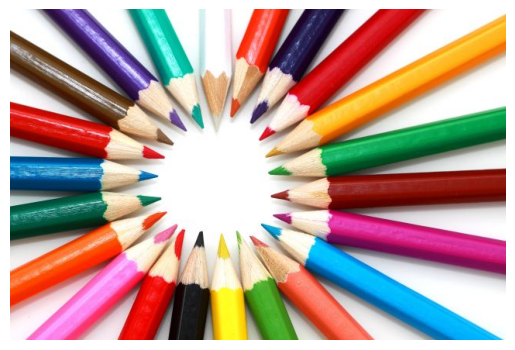

In [6]:
pencils = plt.imread('pencils.jpg', format='jpg')
plt.imshow(pencils)
plt.axis('off')

In [7]:
pencils.shape
pencils_flat = pencils.reshape(-1, 3)
pencils_flat.shape

(273280, 3)

In [8]:
ks = range(2, 20)
inertions = []

for k in ks:
  km = KMeans(n_clusters=k).fit(pencils_flat)
  inertions.append(km.inertia_)

In [9]:
inertions_df = pd.DataFrame({'K' : ks,
                           'Inercja' : inertions})

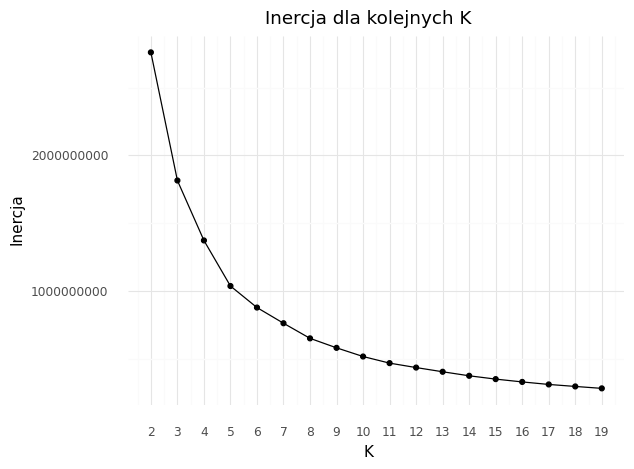

<ggplot: (382781014)>

In [10]:
(ggplot(inertions_df, aes(x = 'K', y = 'Inercja')) + 
 geom_point() + geom_line() +
 scale_x_continuous(breaks = ks) +
 theme_minimal() +
 labs(title = 'Inercja dla kolejnych K'))

In [11]:
km = KMeans(n_clusters=6, random_state=0).fit(pencils_flat)
np.unique(km.labels_)
km.cluster_centers_

array([[243.23731211, 236.43213453, 234.79822277],
       [190.80992228, 140.53948967, 145.21169674],
       [ 53.33865815,  66.291962  ,  56.08562723],
       [ 20.35092752, 165.07448843, 187.12736661],
       [248.11572731, 162.29517199,  46.36039163],
       [191.78625281,  30.68463653,  29.40921355]])

In [12]:
pencils_flat6 = pencils_flat.copy()

for i in np.unique(km.labels_):
  pencils_flat6[km.labels_ == i, :] = km.cluster_centers_[i]

(-0.5, 639.5, 426.5, -0.5)

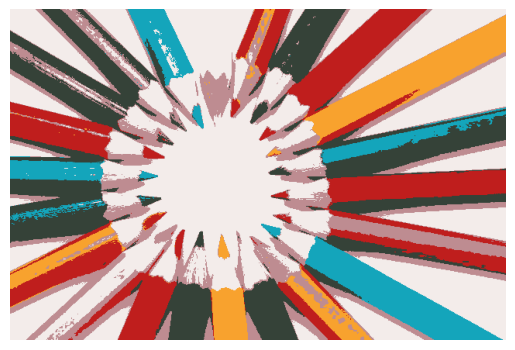

In [13]:
pencils6 = pencils_flat6.reshape(pencils.shape)
plt.imshow(pencils6)
plt.axis('off')